In [ ]:
import sklearn
import torch
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



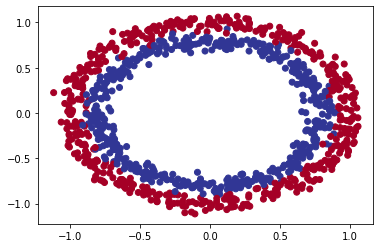

In [ ]:
n_samples = 1000
X, y = make_circles(n_samples, noise = 0.05, random_state = 42)
plt.scatter(x = X[:, 0], y =X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
torch.manual_seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available else "cpu"


class ClassificationV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()
     

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_0 = ClassificationV1().to(device)
model_0


ClassificationV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
#model_0 = nn.Sequential(
#    nn.Linear(in_features = 2, out_features = 5),
#    nn.Linear(in_features = 5, out_features = 1)
#).to(device)

model_0.state_dict()

OrderedDict([('layer_1.weight', tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0

In [ ]:
untrained_preds = model_0(X_test.to(device))


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 1e-4)

def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 10000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_true = y_train,
                 y_pred = y_pred)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_logits =  model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_true = y_test,
                        y_pred = test_pred)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss : {loss: .5f}, Acc: {acc:.2f} | TLoss : {test_loss: .5f}, Acc: {test_acc:.2f} ")
  

Epoch: 0 | Loss :  0.69295, Acc: 50.00 | TLoss :  0.69333, Acc: 50.00 
Epoch: 10 | Loss :  0.69282, Acc: 50.00 | TLoss :  0.69318, Acc: 50.00 
Epoch: 20 | Loss :  0.69270, Acc: 51.12 | TLoss :  0.69304, Acc: 50.00 
Epoch: 30 | Loss :  0.69259, Acc: 53.12 | TLoss :  0.69290, Acc: 50.50 
Epoch: 40 | Loss :  0.69248, Acc: 56.00 | TLoss :  0.69277, Acc: 53.00 
Epoch: 50 | Loss :  0.69238, Acc: 58.00 | TLoss :  0.69266, Acc: 53.00 
Epoch: 60 | Loss :  0.69228, Acc: 61.62 | TLoss :  0.69256, Acc: 55.00 
Epoch: 70 | Loss :  0.69220, Acc: 62.00 | TLoss :  0.69247, Acc: 61.50 
Epoch: 80 | Loss :  0.69212, Acc: 64.00 | TLoss :  0.69238, Acc: 62.00 
Epoch: 90 | Loss :  0.69205, Acc: 63.75 | TLoss :  0.69229, Acc: 64.00 
Epoch: 100 | Loss :  0.69198, Acc: 63.62 | TLoss :  0.69221, Acc: 64.50 
Epoch: 110 | Loss :  0.69191, Acc: 61.12 | TLoss :  0.69213, Acc: 62.50 
Epoch: 120 | Loss :  0.69184, Acc: 59.75 | TLoss :  0.69205, Acc: 61.00 
Epoch: 130 | Loss :  0.69177, Acc: 57.88 | TLoss :  0.69197, A

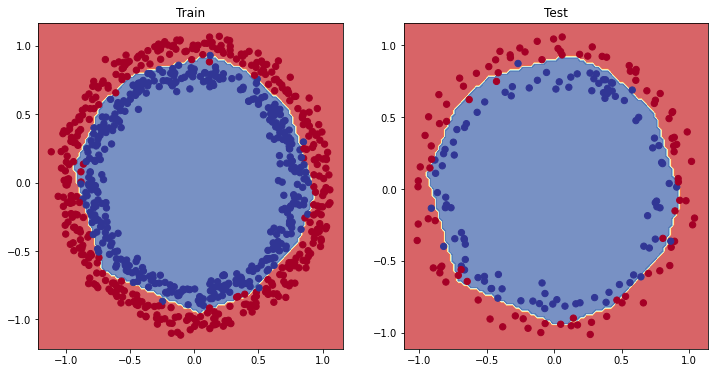

In [ ]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


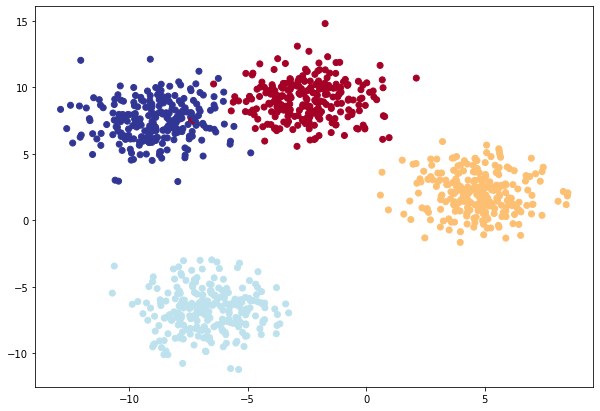

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42


X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])


X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)
X_blob_train, X_blob_test, y_blob_train, y_blob_test = X_blob_train.to(device), X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);



In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"



In [ ]:
class Multi_classification(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=  hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features),
    )
  def forward(self,x):
    return self.linear_layer_stack(x)



model_2 = Multi_classification(input_features = 2,
                               output_features = 4,
                               hidden_units = 8).to(device)


model_2


Multi_classification(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_blob_test)

y_preds[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [ ]:
y_pred_probs = torch.softmax(y_preds, dim = 1)
print(y_pred_probs[:10])

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463],
        [0.3381, 0.1358, 0.1929, 0.3331],
        [0.2867, 0.1841, 0.2861, 0.2431],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3009, 0.1841, 0.2779, 0.2371],
        [0.3595, 0.1350, 0.1695, 0.3360]], device='cuda:0')


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_2.parameters(),
                             lr = 1e-4)

def accuracy_mul(y_true, y_pred):
 
  #print(y_pred_)
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
print(y_blob_train)

In [ ]:
torch.manual_seed(42)

epochs = 1000

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_2.train()

    y_logits = model_2(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_mul(y_true=y_blob_train,
                      y_pred=y_pred)

   
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
      
      test_logits = model_2(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_mul(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.15883, Acc: 40.38% | Test Loss: 1.15489, Test Acc: 35.50%
Epoch: 10 | Loss: 1.15178, Acc: 41.12% | Test Loss: 1.14892, Test Acc: 37.50%
Epoch: 20 | Loss: 1.14479, Acc: 43.88% | Test Loss: 1.14298, Test Acc: 39.50%
Epoch: 30 | Loss: 1.13787, Acc: 45.25% | Test Loss: 1.13710, Test Acc: 40.50%
Epoch: 40 | Loss: 1.13101, Acc: 46.50% | Test Loss: 1.13126, Test Acc: 42.50%
Epoch: 50 | Loss: 1.12418, Acc: 48.00% | Test Loss: 1.12547, Test Acc: 43.50%
Epoch: 60 | Loss: 1.11740, Acc: 49.12% | Test Loss: 1.11969, Test Acc: 44.50%
Epoch: 70 | Loss: 1.11064, Acc: 49.62% | Test Loss: 1.11393, Test Acc: 45.00%
Epoch: 80 | Loss: 1.10392, Acc: 50.00% | Test Loss: 1.10819, Test Acc: 45.50%
Epoch: 90 | Loss: 1.09723, Acc: 50.50% | Test Loss: 1.10245, Test Acc: 46.00%
Epoch: 100 | Loss: 1.09056, Acc: 50.88% | Test Loss: 1.09671, Test Acc: 47.00%
Epoch: 110 | Loss: 1.08392, Acc: 51.25% | Test Loss: 1.09097, Test Acc: 48.00%
Epoch: 120 | Loss: 1.07729, Acc: 51.88% | Test Loss: 1.08523, T

helper_functions.py already exists, skipping download


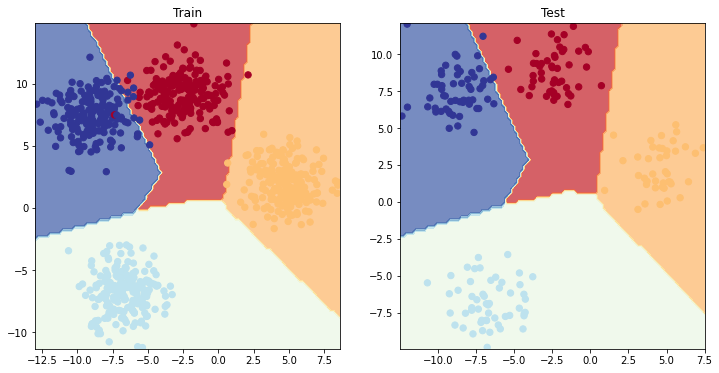

In [ ]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_blob_test, y_blob_test)